# Circuit VS_RL1

In [14]:
import villas.dataprocessing.readtools as rt
import villas.dataprocessing.plottools as pt
from villas.dataprocessing.timeseries import TimeSeries as ts

## DPsim EMT

In [15]:
# DPsim EMT simulation
import dpsim

name = 'EMT_VS_RC1'

# Nodes
gnd = dpsim.emt.Node.GND()
n1 = dpsim.emt.Node('n1')
n2 = dpsim.emt.Node('n2')

# Components
vs = dpsim.emt.ph1.VoltageSource('vs')
vs.V_ref = complex(10,0)
vs.f_src = 50
r1 = dpsim.emt.ph1.Resistor('r_1')
r1.R = 1
c1 = dpsim.emt.ph1.Capacitor('c_1')
c1.C = 0.001

# Connections
vs.connect([gnd, n1])
r1.connect([n1, n2])
c1.connect([n2, gnd])

# Define system topology
system = dpsim.SystemTopology(50, [gnd, n1, n2], [vs, r1, c1])

# Logging
logger = dpsim.Logger(name)
logger.log_attribute(n1, 'v')
logger.log_attribute(n2, 'v')
logger.log_attribute(r1, 'i_intf')

sim = dpsim.Simulation(name, system, timestep=0.0001, duration=0.1, pbar=True, sim_type=1)
sim.add_logger(logger)

await sim.simulate()

HTML(value='Simulation start is pending...')

FloatProgress(value=0.0, max=0.1)

In [16]:
# read EMT results
work_dir = 'logs/'
log_name = 'EMT_VS_RC1'
print(work_dir + log_name + '.csv')

ts_dpsim_emt = rt.read_timeseries_dpsim(work_dir + log_name + '.csv')

logs/EMT_VS_RC1.csv
column number: 3
results length: 1000
real column names: ['n1.v', 'n2.v', 'r_1.i_intf']
complex column names: []


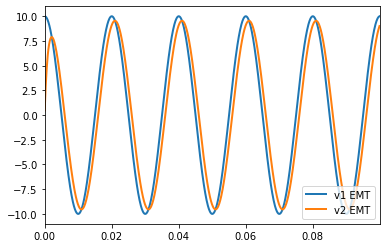

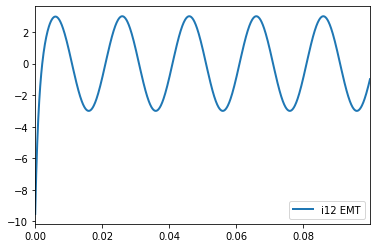

In [17]:
ts_dpsim_emt['n1.v'].label = 'v1 EMT'
ts_dpsim_emt['n2.v'].label = 'v2 EMT'
ts_dpsim_emt['r_1.i_intf'].label = 'i12 EMT'
pt.plot_timeseries(1, ts_dpsim_emt['n1.v'])
pt.plot_timeseries(1, ts_dpsim_emt['n2.v'])
pt.plot_timeseries(2, ts_dpsim_emt['r_1.i_intf'])

## DPsim DP

In [18]:
# DPsim DP simulation
import dpsim

name = 'DP_VS_RC1'

# Nodes
gnd = dpsim.dp.Node.GND()
n1 = dpsim.dp.Node('n1')
n2 = dpsim.dp.Node('n2')

# Components
vs = dpsim.dp.ph1.VoltageSource('vs')
vs.V_ref = 10+0j
r1 = dpsim.dp.ph1.Resistor('r_1')
r1.R = 1
c1 = dpsim.dp.ph1.Capacitor('c_1')
c1.C = 0.001

# Connections
vs.connect([gnd, n1])
r1.connect([n1, n2])
c1.connect([n2, gnd])

# Define system topology
system = dpsim.SystemTopology(50, [gnd, n1, n2], [vs, r1, c1])

# Logging
logger = dpsim.Logger(name)
logger.log_attribute(n1, 'v')
logger.log_attribute(n2, 'v')
logger.log_attribute(r1, 'i_intf')

sim = dpsim.Simulation(name, system, timestep=0.0001, duration=0.1, pbar=True)
sim.add_logger(logger)

await sim.simulate()

HTML(value='Simulation start is pending...')

FloatProgress(value=0.0, max=0.1)

In [19]:
# read DPsim DP results
work_dir = 'logs/'
log_name = 'DP_VS_RC1'
print(work_dir + log_name + '.csv')

ts_dpsim_dp = rt.read_timeseries_dpsim(work_dir + log_name + '.csv')

logs/DP_VS_RC1.csv
column number: 3
results length: 1000
real column names: []
complex column names: ['n1.v', 'n2.v', 'r_1.i_intf']


In [20]:
# convert to emt
ts_dpsim_dp_emt = ts.frequency_shift_list(ts_dpsim_dp, 50)

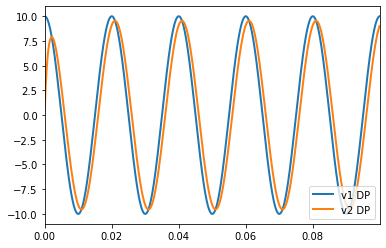

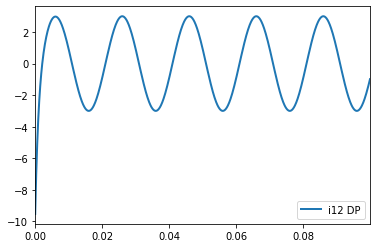

In [21]:
ts_dpsim_dp_emt['n1.v_shift'].label = 'v1 DP'
ts_dpsim_dp_emt['n2.v_shift'].label = 'v2 DP'
ts_dpsim_dp_emt['r_1.i_intf_shift'].label = 'i12 DP'
pt.plot_timeseries(1, ts_dpsim_dp_emt['n1.v_shift'])
pt.plot_timeseries(1, ts_dpsim_dp_emt['n2.v_shift'])
pt.plot_timeseries(2, ts_dpsim_dp_emt['r_1.i_intf_shift'])

## Simulink reference results

In [22]:
# read Simulink log file
import os
import urllib.request

if not os.path.exists('reference-results'):
    os.mkdir('reference-results')

url = 'https://git.rwth-aachen.de/acs/public/simulation/reference-results/raw/master/Simulink/Circuits/SL_VS_RC1.csv'
local_file = 'reference-results/SL_VS_RC1.csv'
urllib.request.urlretrieve(url, local_file) 

ts_sl = rt.read_timeseries_simulink(local_file)

column number: 3
results length: 1001
real column names: ['v1', 'v2', 'i12']
complex column names: []


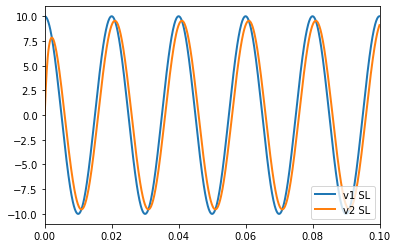

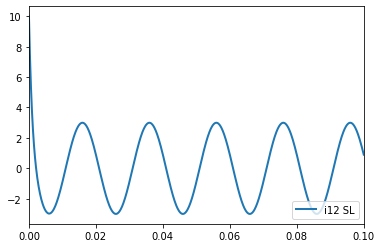

In [23]:
pt.set_timeseries_labels(ts_sl['v1'], 'v1 SL')
pt.set_timeseries_labels(ts_sl['v2'], 'v2 SL')
pt.set_timeseries_labels(ts_sl['i12'], 'i12 SL')
pt.plot_timeseries(1, ts_sl['v1'])
pt.plot_timeseries(1, ts_sl['v2'])
pt.plot_timeseries(2, ts_sl['i12'])

## Comparison

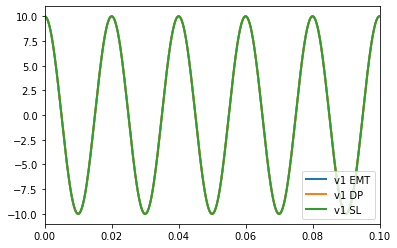

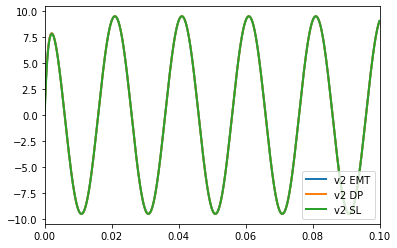

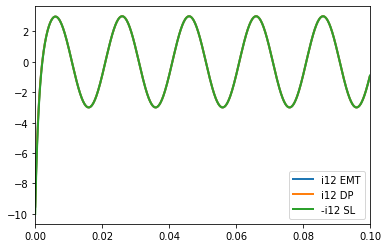

In [24]:
# plot v1
pt.plot_timeseries(1, ts_dpsim_emt['n1.v'])
pt.plot_timeseries(1, ts_dpsim_dp_emt['n1.v_shift'])
pt.plot_timeseries(1, ts_sl['v1'])
# plot v2
pt.plot_timeseries(2, ts_dpsim_emt['n2.v'])
pt.plot_timeseries(2, ts_dpsim_dp_emt['n2.v_shift'])
pt.plot_timeseries(2, ts_sl['v2'])
# plot i12
pt.plot_timeseries(3, ts_dpsim_emt['r_1.i_intf'])
pt.plot_timeseries(3, ts_dpsim_dp_emt['r_1.i_intf_shift'])
ts_sl_scale = ts_sl['i12'].scale(-1)
ts_sl_scale.label = '-i12 SL'
pt.plot_timeseries(3, ts_sl_scale)

In [25]:
# calculate the RMSE between Simulink (ts_sl) and EMT (ts_dpsim_emt)
err_sl_emt = 0
err_sl_emt += ts.rmse(ts_sl['v1'], ts_dpsim_emt['n1.v'])
err_sl_emt += ts.rmse(ts_sl['v2'], ts_dpsim_emt['n2.v'])
err_sl_emt = err_sl_emt / 2
print("Total RMSE of Simulink reference and DPsim EMT: %g" % (err_sl_emt))

# calculate the RMSE between Simulink (ts_sl) and DP (ts_dpsim_dp_emt)
err_sl_dp = 0
err_sl_dp += ts.rmse(ts_sl['v1'], ts_dpsim_dp_emt['n1.v_shift'])
err_sl_dp += ts.rmse(ts_sl['v2'], ts_dpsim_dp_emt['n2.v_shift'])
err_sl_dp = err_sl_dp / 2
print("Total RMSE of Simulink reference and DPsim DP: %g" % (err_sl_dp))

Total RMSE of Simulink reference and DPsim EMT: 0.0175741
Total RMSE of Simulink reference and DPsim DP: 0.0175708


In [26]:
assert err_sl_emt < 0.1
assert err_sl_dp < 0.1